<a href="https://colab.research.google.com/github/yogeshsinghgit/MLProject1/blob/main/Solve_Imbalanced_Classes_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve Imbalanced Classes in Machine Learning

Class Imbalance is one of the common problem arise while working on a classification problem.

class imbalance simply means a big difference between the number of 2 or more classes.

class imbalance causes baisness towards majority classes in our trained model.


Most machine learning algorithms work best when the number of samples in each class is about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the dataframe has imbalanced classes, then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. For example, if the class distribution shows that 99% of the data has the majority class, then any basic classification model like the logistic regression or decision tree will not be able to identify the minor class data points.

## Resampling Techniques to Solve Class Imbalance

One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.

## Resuorces:
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()


In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<Axes: >

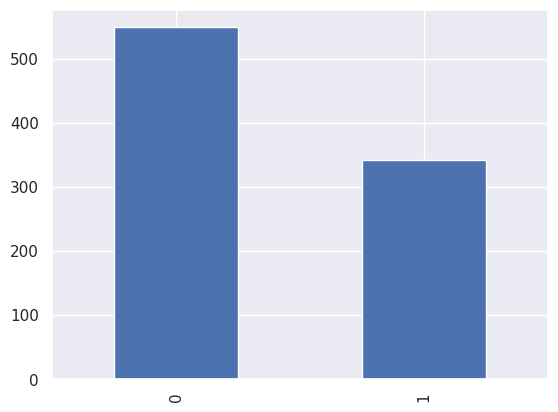

In [10]:
df['survived'].value_counts().plot(kind='bar')

## Resampling

### UpSample

In [9]:
from sklearn.utils import resample

In [12]:
#create two different dataframe of majority and minority class
df_majority = df[(df['survived']==0)]
df_minority = df[(df['survived']==1)]

# Upsample the minority class

df_minor_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 549, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minor_upsampled, df_majority])

<Axes: >

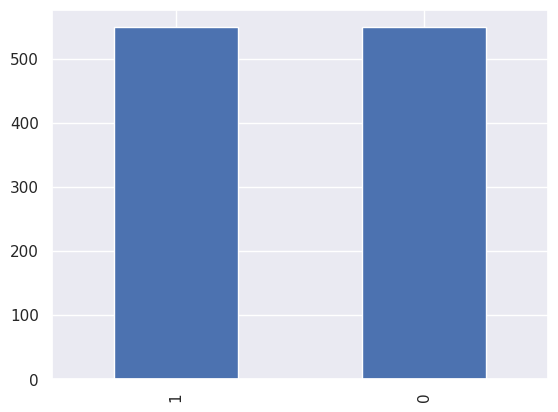

In [14]:
df_upsampled['survived'].value_counts().plot(kind='bar')

In [16]:
df_upsampled[df_upsampled['survived']==1].duplicated().sum()

293

### Downsampling

In [21]:
#create two different dataframe of majority and minority class
df_majority = df[(df['survived']==0)]
df_minority = df[(df['survived']==1)]

# Upsample the minority class

df_major_downsampled = resample(df_majority,
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_minority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_major_downsampled, df_minority])

<Axes: >

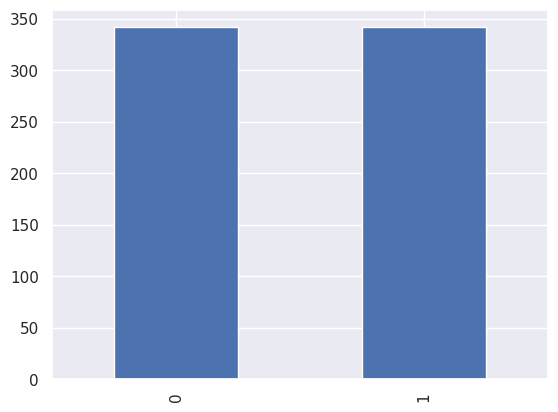

In [22]:
df_downsampled['survived'].value_counts().plot(kind='bar')

### Smote Technique

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

oversampled_X, oversampled_Y = sm.fit_resample(df.drop('survived', axis=1), df['survived'])

oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)